# Global Societal Endangerment Index (GSEI)

Development notebook for step 9: Link to other indicators

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import country_standardisation as my_cs

In [45]:
df = pd.read_csv('GSEI.csv', index_col=0)

## Other indices

- World Risk Index
- IRC Emergency Watchlist
- INFORM Risk Index

### World Risk Index

In [46]:
wri = pd.read_csv('data/other_indices/worldriskindex-2024.csv')
wri['Country'] = my_cs.standardise_countries(wri['ISO3.Code'])

gsei_wri = pd.merge(df[['Country', 'GSEI']], wri[['Country', 'W']], how='inner', on='Country')

In [55]:
# correlation
gsei_wri.corr(numeric_only=True, method='pearson').iloc[0, 1]

0.30177639649246846

In [54]:
# rank comparison
dw_ranked = gsei_wri.rank(numeric_only=True, ascending=False)

# Compute Spearman rank correlation (for ordinal comparison)
dw_ranked.corr(method='spearman').iloc[0, 1]

0.3421611247204851

### IRC Emergency Watchlist

In [79]:
irc = pd.read_csv('data/other_indices/IRC_emergency_watchlist_2025.csv').reset_index(names='Ranking')
irc['Country'] = my_cs.standardise_countries(irc['Country'])
irc['Ranking'] = irc['Ranking'] * -1  # invert ranking to match GSEI ranking (higher is worse)

gsei_irc = pd.merge(df[['Country', 'GSEI']], irc[['Country', 'Ranking']], how='inner', on='Country')

gsei_irc.rank(numeric_only=True, ascending=False).corr(method='spearman').iloc[0, 1]

Using fuzzy match for 'Palestine' -> 'Palestine, State of'
Using special case for 'Democratic Republic of the Congo' -> 'Congo, Democratic Republic of the'


0.16821465428276575

In [91]:
for sub in ['env', 'pol', 'soc', 'eco', 'threat']:
    sub_irc = pd.merge(df[['Country', sub]], irc[['Country', 'Ranking']], how='inner', on='Country')

    print(sub_irc.rank(numeric_only=True, ascending=False).corr(method='spearman').iloc[0, 1], f'-> corr({sub}, IRC)')

-0.25077399380804954 -> corr(env, IRC)
0.40144478844169246 -> corr(pol, IRC)
-0.11455108359133127 -> corr(soc, IRC)
0.26522187822497423 -> corr(eco, IRC)
-0.0196078431372549 -> corr(threat, IRC)


### INFORM Risk Index

In [58]:
inform = pd.read_csv('data/other_indices/INFORM_Risk_2025_v069.csv')
inform['Country'] = my_cs.standardise_countries(inform['ISO3'])

gsei_inform = pd.merge(df[['Country', 'GSEI']], inform[['Country', 'INFORM Risk']], how='inner', on='Country')

In [59]:
# correlation
gsei_inform.corr(numeric_only=True, method='pearson').iloc[0, 1]

0.8669899195534742

In [60]:
# rank comparison
di_ranked = gsei_inform.rank(numeric_only=True, ascending=False)

di_ranked.corr(method='spearman').iloc[0, 1]

0.8331809062787235

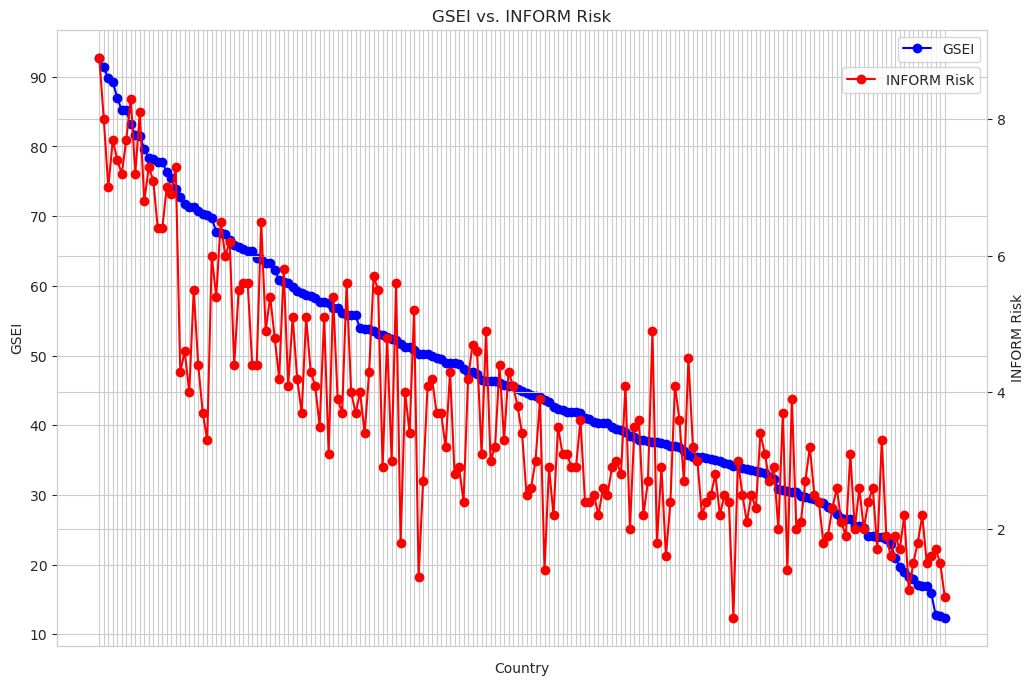

In [89]:
# line plot comparing GSEI and INFORM Risk
gi = gsei_inform.sort_values('GSEI')
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax1.plot(gi['GSEI'], color='blue', marker='o', label='GSEI')
ax2.plot(gi['INFORM Risk'], color='red', marker='o', label='INFORM Risk')
ax1.set_xlabel('Country')
ax1.set_ylabel('GSEI')
ax2.set_ylabel('INFORM Risk')
ax1.set_xticks(range(len(gi)))
ax1.set_xticklabels("")
ax1.set_title('GSEI vs. INFORM Risk')
# legend
ax1.legend(loc='upper right')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95))

# fig.savefig('GSEI_INFORM_Risk.png', dpi=200, bbox_inches='tight')